In [12]:

import numpy as np
import matplotlib.pyplot as plt
from  Reson_Sim.Resonator import Resonator as rs

rs1 = rs(Temp=np.arange(0,11,1))

co2 at abs depth of 75%
Gases: co2, 


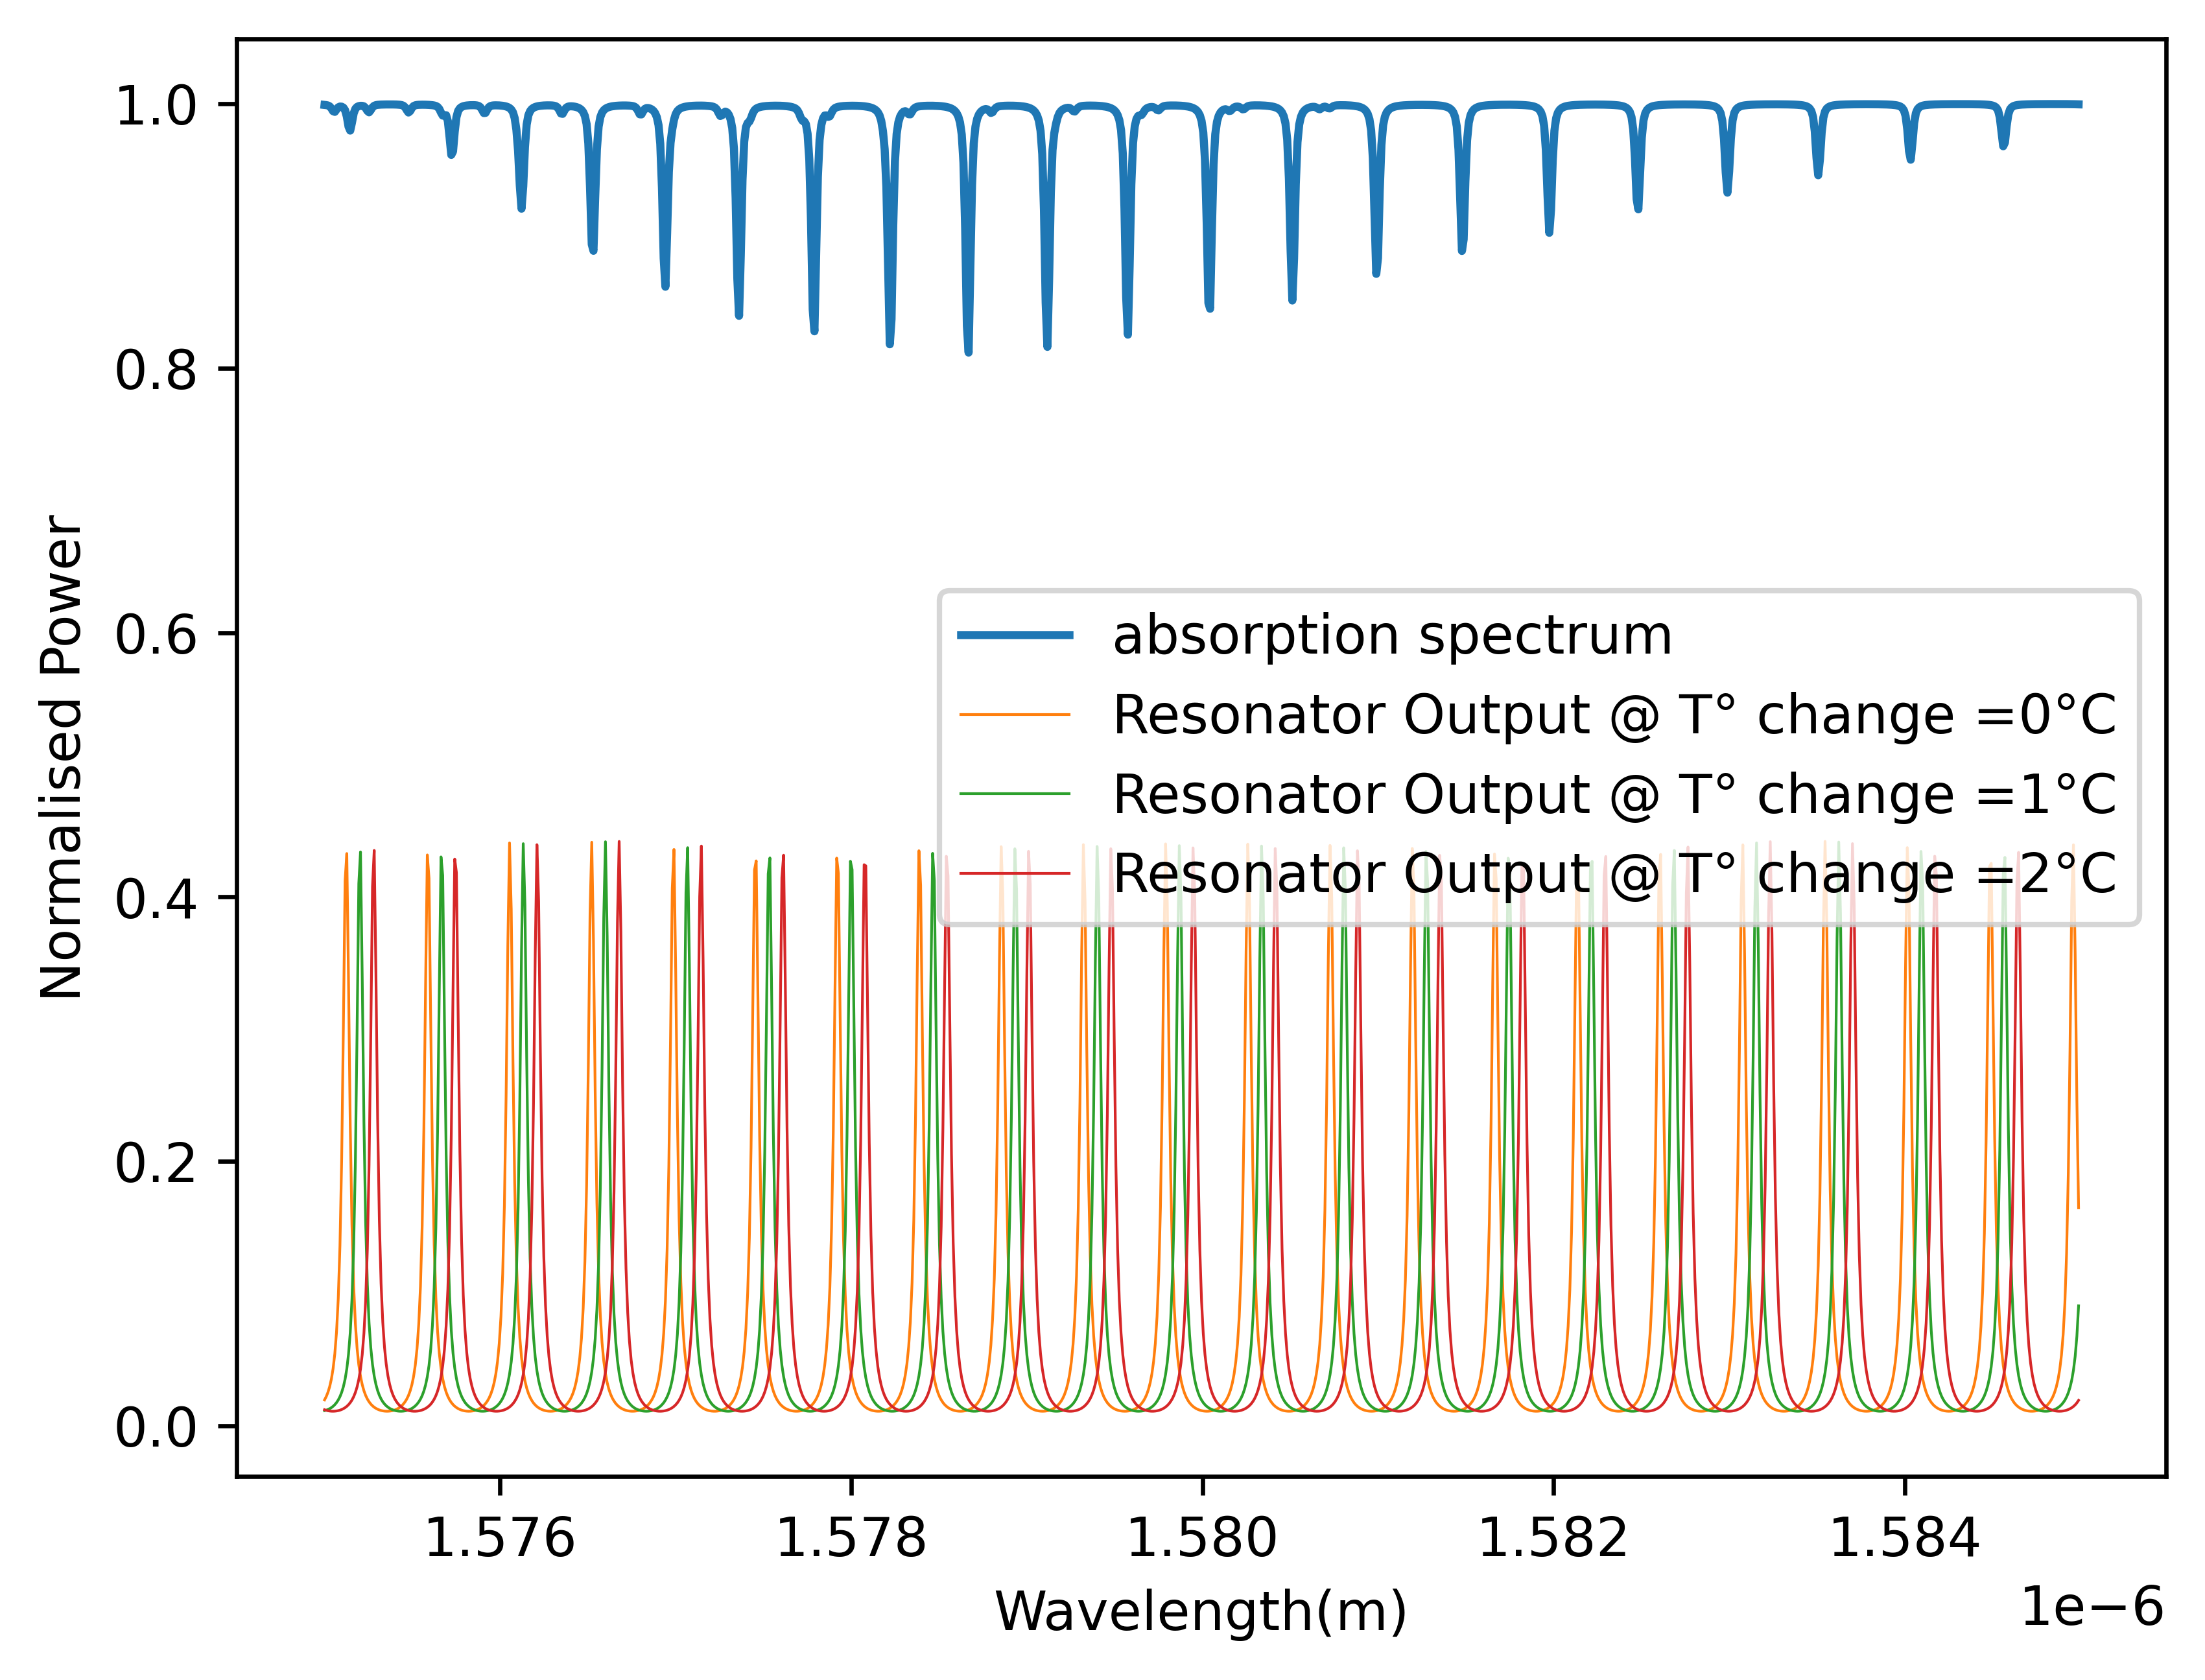

In [13]:
rs1.display_output(range(0,3))

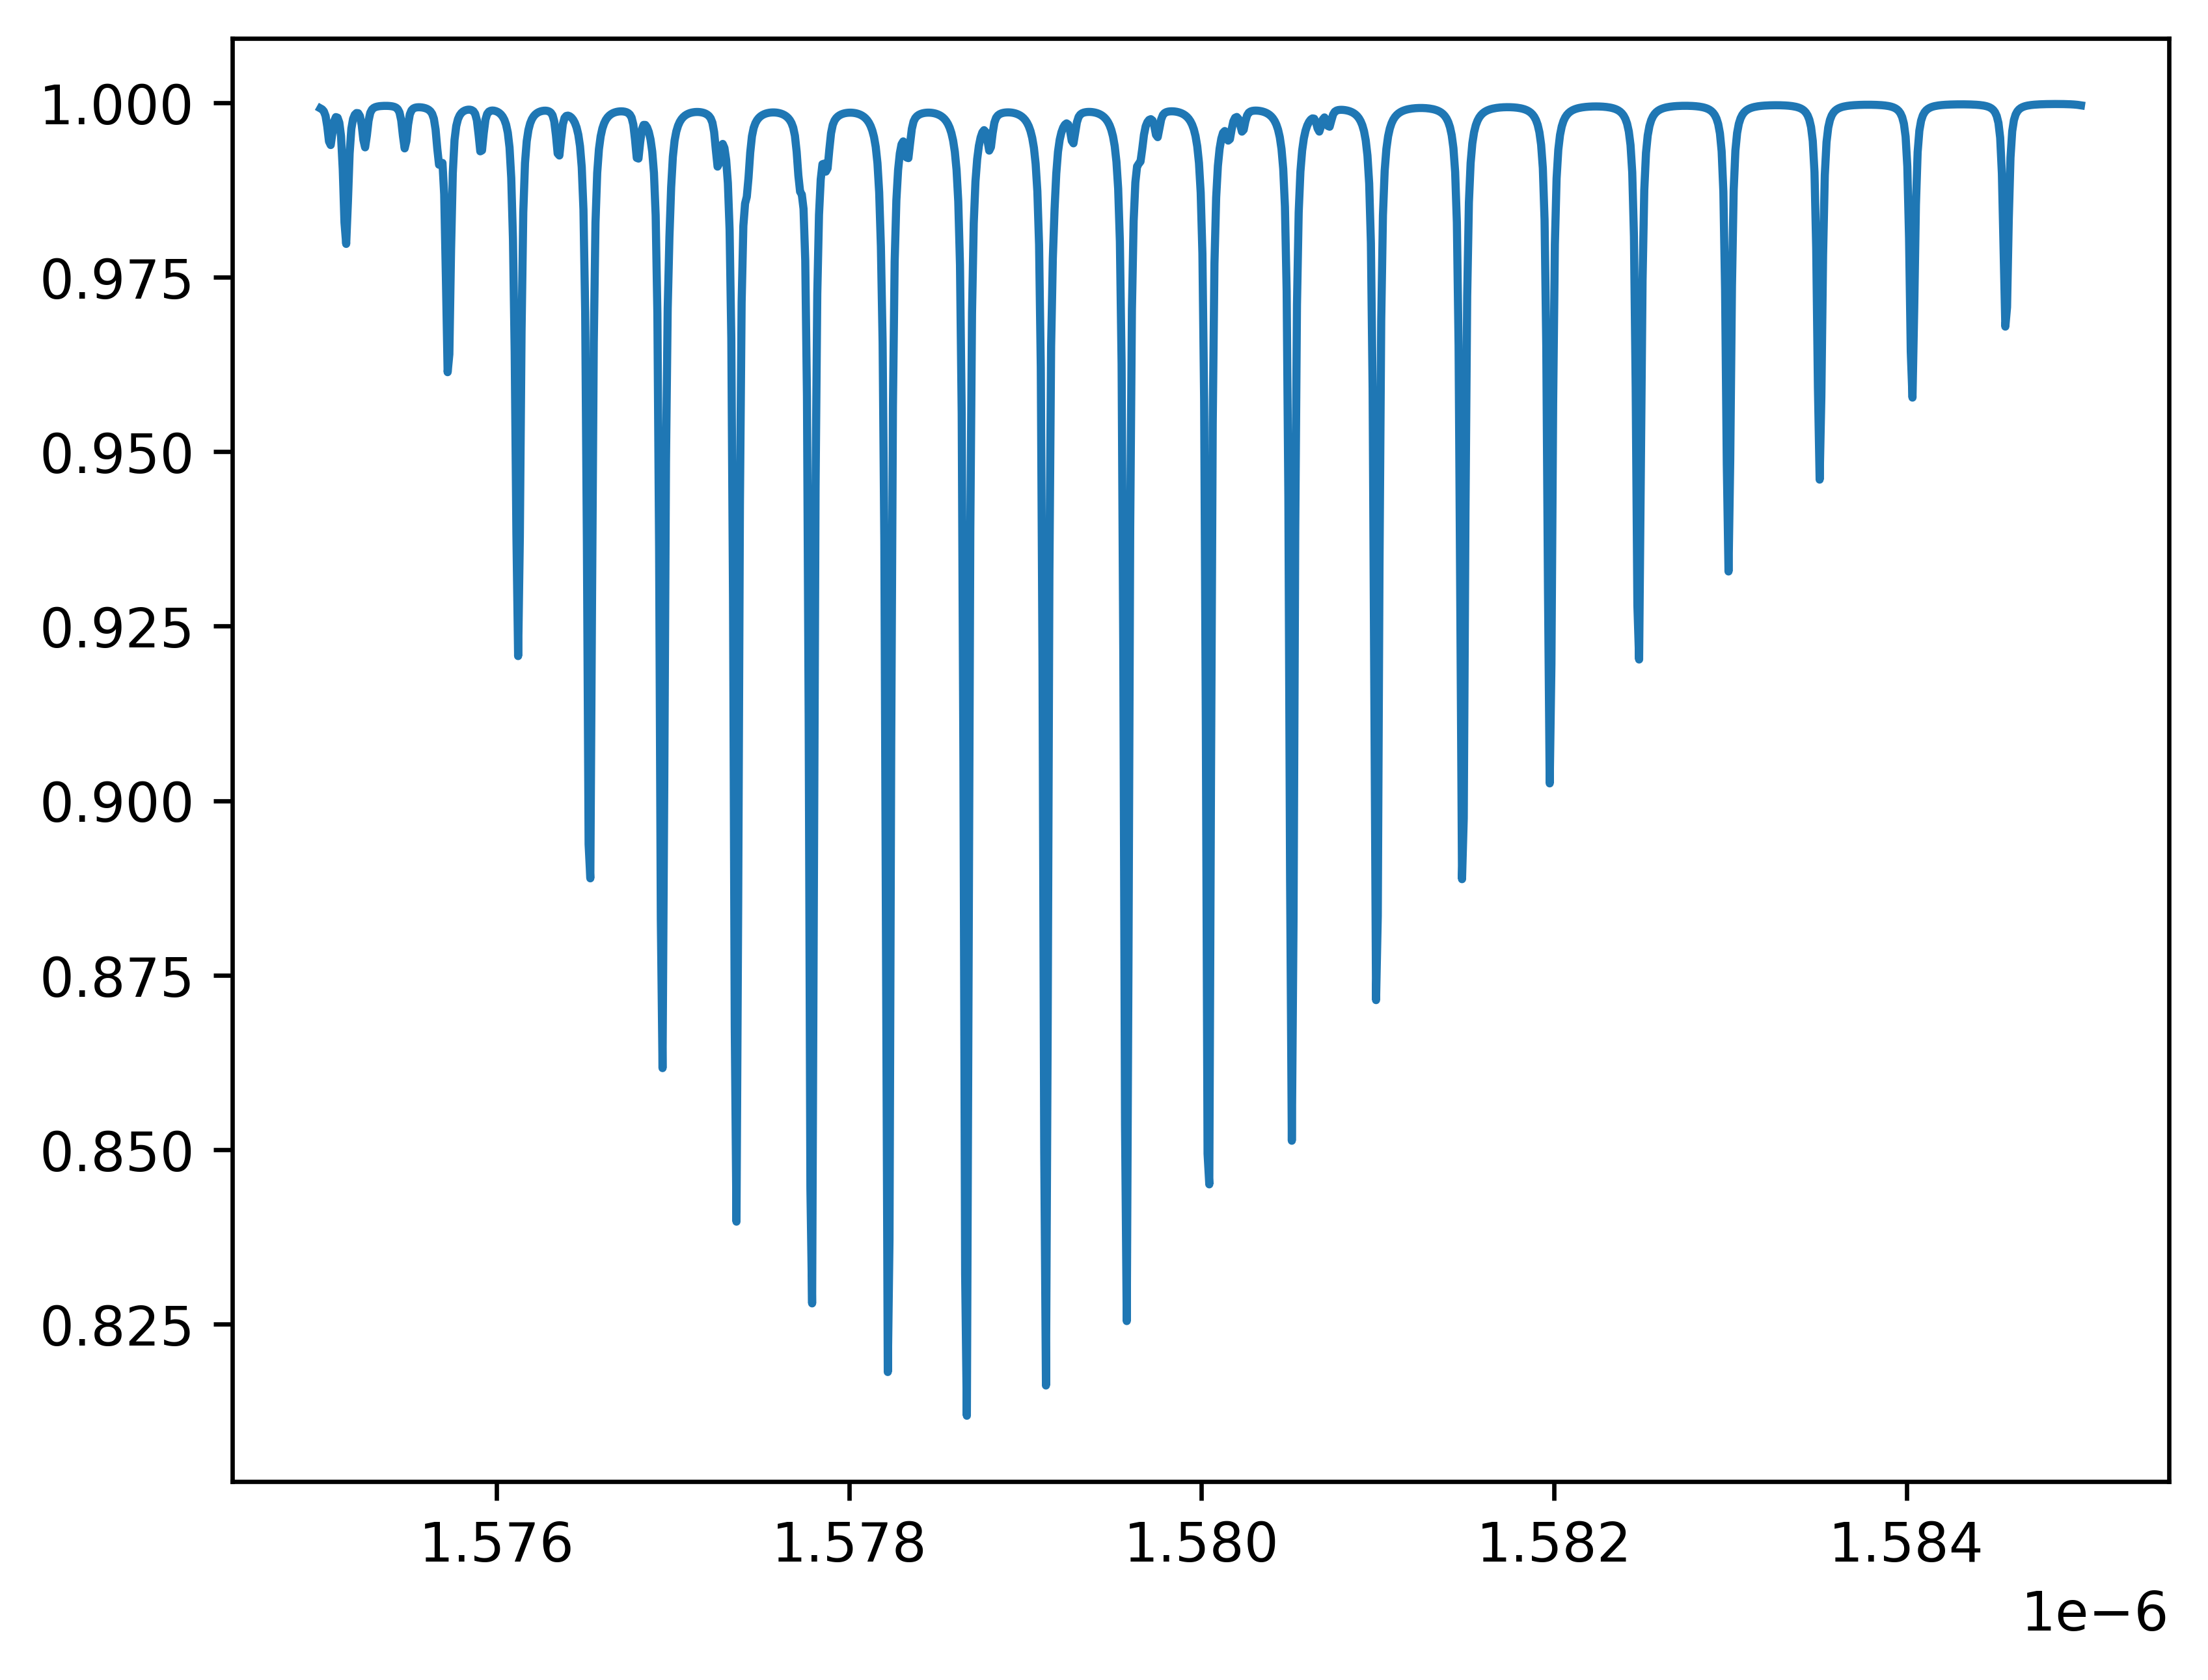

In [3]:
plt.figure(dpi=600)
a = rs1.abs_spectrum
plt.plot(rs1.wavelength,a)
